# BIG DATA A3 - Notebook du projet

<i>Strasbourg, Juillet 2019</i>

## Contexte

Alors que la canicule frappe dûrement la France, que Greta Thunberg ne cesse de faire la une des journaux suite à ses déclarations alarmantes, et qu'aucun pays ne prend de réelles actions au sujet du climat, notre jeune équipe d'ingénieurs informaticiens au CesiCDP décide de répondre à l'appel de l'Agence de l’Environnement et de la Maîtrise de l’Energie.

Notre entreprise a une expérience non négligeable dans le domaine de la mobilité. De petite entreprise de quelques membres en 2010, CesiCDP s'est grandement développée en quelques années après avoir mis en place en 2012 un système de livraisons communautaire permettant à n'importe qui, contre rémunération, de livrer colis ou courrier. Nous comptons aujourd'hui plus de 50 000 employés dans 195 pays différents, nos services sont déployés partout dans le monde et nous sommes des invités récurrents dans les sommets concernant la mobilité.

Cet appel de l'ADEME est une nouvelle occasion pour nous de montrer notre sens de l'innovation, ainsi que de prouver que nous portons un grand intérêt au problèmes majeurs de notre société. Nous accordons beaucoup d'importance à rendre la vie de nos clients meilleure, mais également celle des autres personnes que nous pouvons impacter de part nos services. C'est pourquoi nous avons décidé de prendre nos responsabilités et de répondre à cet appel.

Pour y répondre, notre équipe composée de 5 membres a réalisé une étude concernant la gestion des transports, que ce soit pour de la livraison, pour le ramassage des déchets, pour le traitement du réseau routier, etc.
A l'heure actuelle, les chauffeurs réalisent leurs itinéraires selon leur expérience, ou encore selon leurs préférences, ce qui parfois amène a des trajets plus longs qu'ils ne devraient l'être.  
L'optimisation de ces trajets sera donc le sujet de cette étude.

Cette étude d'optimisation, en plus de pouvoir être utilisé par les livreurs, pourra également être utilisé pour définir le trajet des drones de livraisons, pratique de plus en plus populaire, notamment chez Amazon, lesquels ont déclaré récemment que  des drones de livraisons allaient être déployés prochainement dans certaines villes.  
Il sera donc possible de tendre vers un système de livraison complètement automatique et parfaitement optimisé pour réduire coûts et pollution.

Ce document synthéthisera les résulats de cette études, avec une présentation des différentes métaheuristiques ainsi que leurs résultats. 

## Le problème

### Synthèse

Pour synthéthiser, le problème que cette étude va résoudre est le suivant :

Un camion de livraison doit ravitailler un nombre donné de villes, il doit passer par toutes les villes et effectuer sa livraison pendant la fenêtre horaire relative à chaque ville.

<b>Diminuer au maximum la distance parcourue pour effectuer toutes les livraisons, tout en respectant les fenêtres de livraison de chaque ville.</b>

### Étude de complexité

#### Classe de complexité

C'est un problème appartenant à la classe des problèmes NP-Complet. Il n’existe pas d’algorithme permettant de trouver une solution exacte en temps polynomial pour ce problème. 
Ce problème est une variante du problème du voyageur de commerce, qui est également NP-Complet, avec une contrainte supplémentaire (celle des fenêtres de livraison).

Pour démontrer que notre problème est NP-Complet, il suffit de démontrer que celui du voyageur du commerce est NP-Complet.

Pour prouver que le problème du voyageur de commerce est bien NP-Complet on utilise un raisonnement par l’absurde en conjecturant que dans le cas général il n’existe pas d’algorithme d’approximation permettant de le résoudre et que P ≠ NP.

Le but est de répondre à « existe-t-il chemin un chemin plus court que D passant par toutes les villes et qui termine sur la ville de départ ». Cela revient à trouver un cycle hamiltonien.  
Nous allons alors chercher à démontrer qu’il existe un algorithme d’approximation (1 + Y) (Y est lu Upsilon, il représente une très petite valeur) avec Y > 0 qui permet de résoudre le problème de recherche d’un cycle hamiltonien en temps polynomial.

On considère un graphe G non complet d’arrêtes de poids 1. Le graphe complet de G noté G’ est le graphe ou l’on rajoute à deux sommets non reliés une arrête de poids |S|(1+Y)+1 avec |S| le nombre de sommet de G.
Si G possède un chemin hamiltonien, alors G’ possède un cycle de poids |S|, sinon le cycle minimal contient au moins une arrête de poids |S|(1+Y)+1 et le poids de du cycle sera alors de |S|(2+Y).  
Dans ce cadre la l’algorithme d’approximation est capable de trouver un cycle de poids |S|(1+Y) ou |S|(2+Y). 

Nous avons donc trouvé une solution en temps polynomial alors que le problème fait partie de NP. Cela démontre notre conjecture que le problème du voyageur de commerce est bien dans NP.

#### Complexité du problème

La complexité du problème du voyageur de commerce est O(n !), c’est une factoriel. Cela signifie que pour un ensemble de ville n il y a n! chemin possible. Une factoriel est défini par la fonction :

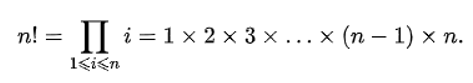

Dans notre cas le point de départ ne change pas et vu que les chemins allés et retour sont les mêmes et font donc la même distance on à (n-1)! Chemin à parcourir dans les deux sens ce qui décrits qu’il y a en tout ((2n-1!))/2 chemins possibles.
 
Le tableau présente le nb de possibilités ainsi que le temps de calcul (en microseconde) nécessaire à sa réalisation en fonction du nombre de ville avec 1 possibilités = 1 microseconde.

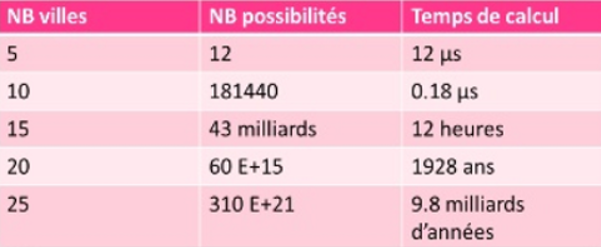

On peut voir que l’augmentation du nombre de villes augmente grandement le nombre de possibilités, le temps de calcul dépasse rapidement ce qu’il est possible de réaliser avec les instruments que nous avons à disposition actuellement.


# Solutions

Ci-dessous sont listées chaque solution traitée par cette étude pour permettre de résoudre le problème d'optimisation des trajets.


## L'algorithme de la recherche tabou
### Présentation

La recherche tabou consiste en ce qui suit :

En partant d'une position donnée, choisir la position voisine qui minimise la fonction objectif.  
Le mécanisme de la recherche tabou va être de stocker les positions déjà explorées dans une liste tabou de type First In First Out d'une taille donnée, et d'interdire de retourner sur les positions contenues dans la liste.

Dans notre contexte, il se réalise de la façon suivante :

Partir d'une ville donnée, regarder les villes les plus proches et choisir celle qui est la plus près et dont la fenêtre de livraison est ouverte.
Les villes déjà explorées entrent dans la "liste tabou" de taille variable, et tant qu'elles seront dans cette liste le livreur n'aura pas le droit d'y retourner.

### Résultats

Pour notre problème, cet algorithme a eu les résultats suivants :

## L'algorithme du recuit simulé

### Présentation

Le recuit simulé consiste en ce qui suit :  

On définit une température initiale (T0), une température à atteindre (Tmin) ainsi qu'une vitesse de refroidissement (tau).

On appelle Energie E la fonction à minimiser. Suite à une modification de l'état du système, un autre état est obtenu. Si il améliorer le critère que l'on veut optimiser, il fait baisser l'énergie du système.  
Si cet été dégrade le critère que l'on veut optimiser, il est possible de l'accepter selon une probabilité p, ce qui permet d'éviter un optimum local.

L'algorithme s'arrête une fois la température minimum atteinte.  

Dans notre contexte, il se réalise de la façon suivante :

Réaliser un trajet aléatoire, puis calculer la distance totale que représente ce trajet.  
Ensuite, échanger aléatoirement deux arêtes de ce trajet. On applique ensuite la loi de Métropolis :  
Si la distance totale a baissé, on garde ce changement. Sinon, elle peut être gardé selon une proba p définie par :  
![probarecuit.PNG](attachment:probarecuit.PNG) Avec E l'énergie (la distance totale) et T la température du système.

On applique ensuite la loi de refroidissement, qui est une loi de décroissance exponentielle : !![loirefroidissement.PNG](attachment:loirefroidissement.PNG)

Lorsque que la température a atteint le minimum donné, on considère que l'algorithme a terminé et que la solution est optimisée.

### Résultats

Pour notre problème, cet algorithme a eu les résultats suivants :

Pour 10 villes :

![recuit10villes.PNG](attachment:recuit10villes.PNG)

Pour 50 villes :

![recuit50villes.PNG](attachment:recuit50villes.PNG)

In [1]:
from scipy import *
from matplotlib.pyplot import *

#Definition des paramètres

cities = 50
T0 = 15.0 #temperature initiale
Tmin = 0.01 #fixe la fin du recuit
tau = 10000 #définit la vitesse de baisse de température

#Fonction qui va permettre de calculer l'énergie totale, en mesurant la somme des distances entre les villes dans l'ordre de parcours du trajet, c'est à dire donc la distance de trajet.
def totalEnergy():
    global path
    energy = 0
    coordinates = c_[x[path],y[path]]
    energy = sum(sqrt(sum((coordinates - roll(coordinates,-1,axis=0))**2,axis=1)))
    return energy

#Fonction qui va swapper un certain nombre de segments (entre i et j), ce qui entrainera un changement d'énergie dans le système
#Swap inverse lorsqu'elle est réappellé avec les mêmes valeurs (pour retour aux trajets antérieurs)
def swapping(i, j):
    global path
    Minimum = min(i,j)
    Maximum = max(i,j)
    path[Minimum:Maximum] = path[Minimum:Maximum].copy()[::-1]
    return

#Vérification de l'énergie, et on décide si la fluctuation est gardée ou non selon la proba de l'algo
def Metropolis(E1,E2):
    global T
    if E1 <= E2:
        E2 = E1  # énergie du nouvel état = énergie système
    else:
        dE = E1-E2
        if random.uniform() > exp(-dE/T): # la fluctuation est retenue avec la proba p. sinon retour trajet antérieur
            swapping(i,j)              
        else:
            E2 = E1 # la fluctuation est retenue 
    return E2

#variables à instancer
t = 0
T = T0

#variables d'historique
Henergy = []
Htime = []
Htemp = []

#placement de N villes sur le plan
x = random.uniform(size=cities)
y = random.uniform(size=cities)

#trajet initial réalisé selon l'ordre d'apparition des villes
path = arange(cities)
initialPath = path.copy()

#On calcule la distance initiale séparant les villes, qu'il va falloir minimiser
Ec = totalEnergy()

while T>Tmin:
    #permet de choisir deux villes différentes au hasard
    i = random.randint(0, cities-1)
    j = random.randint(0, cities-1)
    if i == j: continue

    #On appelle le swapping et on mesure l'énergie
    swapping(i, j)
    Ef = totalEnergy()
    Ec = Metropolis(Ef, Ec)

    #loi de refroidissmenet
    t += 1
    T = T0*exp(-t/tau)

    #on rajoute les variables à l'historique
    if t % 10 == 0:
        Henergy.append(Ec)
        Htime.append(t)
        Htemp.append(T)

#display de nos resultats
print(float(Henergy[0]))
print(float(Ec))
print(float(t))

26.18150240900274
6.986166414707497
73133.0


# Étude statistique

Ci-dessous sont listées des statistiques qui ont été générées à partir des solutions vues ci-dessus.

## Algorithme de la recherche tabou